In [95]:
import pandas as pd

df = pd.read_csv("pbp_18-19.csv")
print(df.shape)

(568577, 27)


In [96]:
# (df["AwayEvent"].str.contains("block") | df["HomeEvent"].str.contains("block")).sum()

In [97]:
df.columns

Index(['PlayNum', 'GameID', 'Date', 'Period', 'Possession', 'Time', 'AwayName',
       'AwayScore', 'AwayEvent', 'HomeName', 'HomeScore', 'HomeEvent',
       'AwayIn', 'AwayOut', 'HomeIn', 'HomeOut', 'ActivePlayers', 'A1', 'A2',
       'A3', 'A4', 'A5', 'H1', 'H2', 'H3', 'H4', 'H5'],
      dtype='object')

In [98]:
# Count the number of times both of HomeEvent and AwayEvent are not null
print("Number of home events:", df["HomeEvent"].notnull().sum())
print("Number of away events:", df["AwayEvent"].notnull().sum())

# These should be 0
print("Both null:", df[(df["HomeEvent"].isnull()) & (df["AwayEvent"].isnull())].shape[0])
print("Neither null:", df[(df["HomeEvent"].notnull()) & (df["AwayEvent"].notnull())].shape[0])

Number of home events: 290869
Number of away events: 288342
Both null: 0
Neither null: 10634


In [99]:
is_home_play = df["HomeEvent"].notnull()
df["Event"] = df["HomeEvent"].fillna("") + df["AwayEvent"].fillna("")

df["Offensive_rebound"] = df["Event"].str.contains("Offensive rebound")
df["Defensive_rebound"] = df["Event"].str.contains("Defensive rebound")
df["Steal"] = df["Event"].str.contains("steal")
df["Block"] = df["Event"].str.contains("block")

# Compute points scored as the difference in score between the next play and this play
# for the team who made the play
df["Points"] = is_home_play * (df["HomeScore"] - df["HomeScore"].shift(1)) + \
                (1 - is_home_play) * (df["AwayScore"] - df["AwayScore"].shift(1))

In [100]:
# Exclude jump balls, timeouts, and start/end of quarters
print("Pre-filtering: " + str(len(df)))
bad_possessions = (df["AwayEvent"].str.contains("Jump ball") | df["HomeEvent"].str.contains("Jump ball")
                    | df["AwayEvent"].str.contains("End of") | df["HomeEvent"].str.contains("End of")
                    | df["AwayEvent"].str.contains("Start of") | df["HomeEvent"].str.contains("Start of"))
df = df[~bad_possessions]
print("Post-filtering: " + str(len(df)))

Pre-filtering: 568577
Post-filtering: 557943


In [101]:
print("Offensive rebounds:", df["Offensive_rebound"].sum())
print("Defensive rebounds:", df["Defensive_rebound"].sum())
print("Steal:", df["Steal"].sum())
print("Block:", df["Block"].sum())

Offensive rebounds: 39841
Defensive rebounds: 89525
Steal: 18432
Block: 11989


In [102]:
# df has multiple rows per possession, so we need to group by possession and sum
new_cols = ["GameID", "Possession", "Offensive_rebound", "Defensive_rebound", "Steal", "Block", "Points"]
new_df = df[new_cols].groupby(["GameID", "Possession"]).sum(numeric_only=True)

In [103]:
new_df.describe()

,Offensive_rebound,Defensive_rebound,Steal,Block,Points
count,259417.000000,259417.000000,259417.000000,259417.000000,259417.000000
mean,0.153579,0.345101,0.071052,0.046215,1.032577
std,0.420364,0.475402,0.256912,0.215425,1.249032
min,0.000000,0.000000,0.000000,0.000000,-144.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,0.000000,2.000000
max,8.000000,1.000000,1.000000,3.000000,5.000000


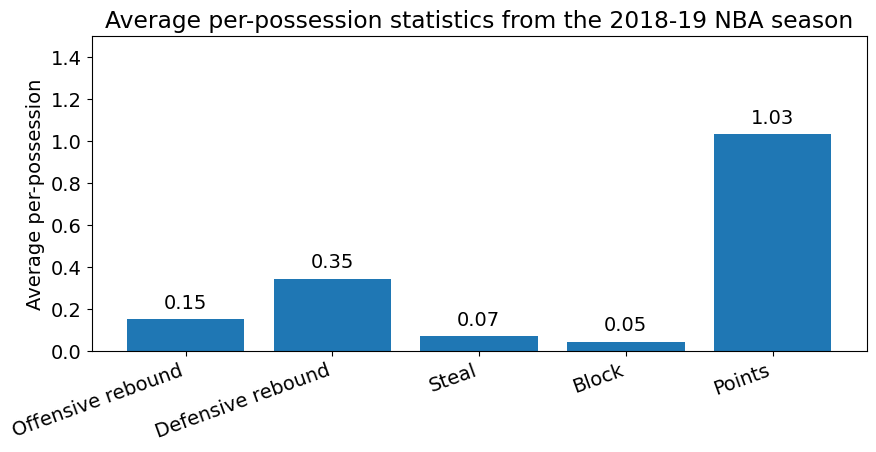

In [140]:
# Plot the means of new_df as a bar chart with the value above each bar
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(new_df.columns.str.replace("_", " "), new_df.mean())

for i, v in enumerate(new_df.mean()):
    plt.text(i - 0.15, v + 0.05, str(round(v, 2)))

# Change y-axis bounds
plt.ylim(0, 1.5)

plt.title("Average per-possession statistics from the 2018-19 NBA season")
plt.ylabel("Average per-possession")

# Increase the font size
plt.rcParams.update({'font.size': 14})

# Add more space between columns
plt.subplots_adjust(wspace=0.5)

# Wrap the text of the x-axis labels
plt.xticks(rotation=20, ha="right")

plt.subplots_adjust(bottom=0.25)

# Save the bar plot
plt.savefig("possessions.png")

plt.show()

In [104]:
# Count the number of unique players
player_cols = ["A1", "A2", "A3", "A4", "A5", "H1", "H2", "H3", "H4", "H5"]
players = set().union(*df[player_cols].values)
len(players)

530

In [105]:
df.head(20)

,PlayNum,GameID,Date,Period,Possession,Time,AwayName,AwayScore,AwayEvent,HomeName,...,H2,H3,H4,H5,Event,Offensive_rebound,Defensive_rebound,Steal,Block,Points
1,1,201902100DAL,02/10/2019,1,1.0,11:40.0,POR,0,J. Nurkić misses 2-pt hook shot from 7 ft,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,J. Nurkić misses 2-pt hook shot from 7 ft,False,False,False,False,0.0
2,2,201902100DAL,02/10/2019,1,2.0,11:37.0,POR,0,NaN,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,Defensive rebound by L. Dončić,False,True,False,False,0.0
3,3,201902100DAL,02/10/2019,1,2.0,11:18.0,POR,0,NaN,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,L. Dončić misses 3-pt jump shot from 28 ft,False,False,False,False,0.0
4,4,201902100DAL,02/10/2019,1,3.0,11:14.0,POR,0,Defensive rebound by A. Aminu,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,Defensive rebound by A. Aminu,False,True,False,False,0.0
5,5,201902100DAL,02/10/2019,1,3.0,11:02.0,POR,2,A. Aminu makes 2-pt jump shot from 10 ft,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,A. Aminu makes 2-pt jump shot from 10 ft,False,False,False,False,2.0
6,6,201902100DAL,02/10/2019,1,4.0,10:53.0,POR,2,NaN,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,L. Dončić makes 2-pt dunk from 1 ft,False,False,False,False,2.0
7,7,201902100DAL,02/10/2019,1,5.0,10:53.0,POR,2,NaN,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,Shooting foul by J. Nurkić (drawn by L. Dončić),False,False,False,False,0.0
8,8,201902100DAL,02/10/2019,1,5.0,10:53.0,POR,2,NaN,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,L. Dončić makes free throw 1 of 1,False,False,False,False,1.0
9,9,201902100DAL,02/10/2019,1,6.0,10:45.0,POR,2,D. Lillard misses 2-pt jump shot from 18 ft,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,D. Lillard misses 2-pt jump shot from 18 ft,False,False,False,False,0.0
10,10,201902100DAL,02/10/2019,1,7.0,10:42.0,POR,2,NaN,DAL,...,finnedo01,brunsja01,doncilu01,hardati02,Defensive rebound by L. Dončić,False,True,False,False,0.0
